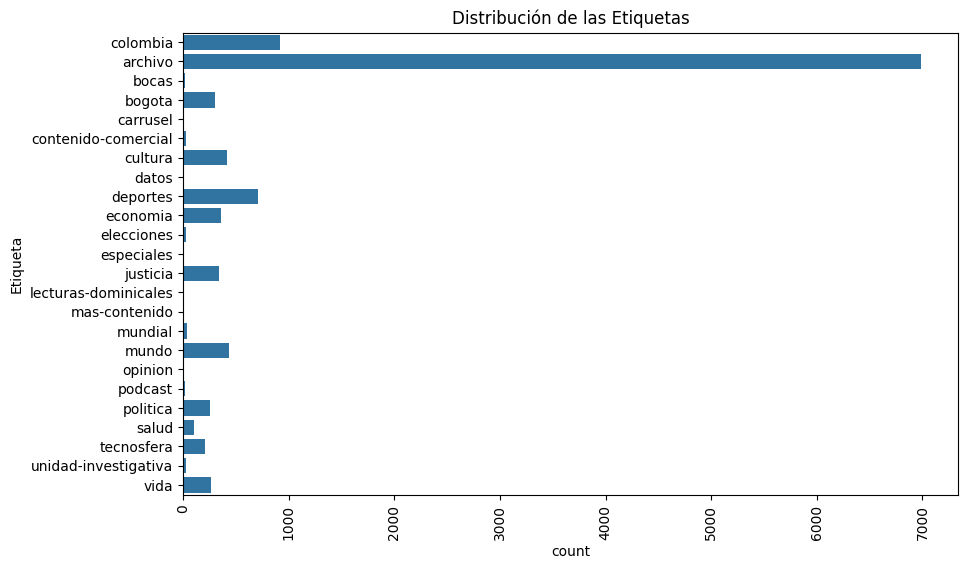

In [33]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '../data_raw/Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(data['Etiqueta'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

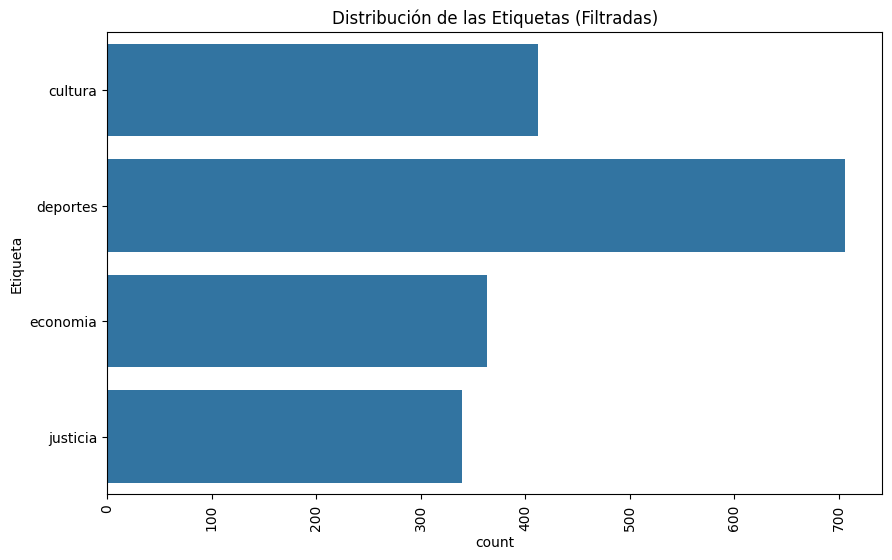

In [34]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()

In [35]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras
import tensorflow as tf

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)

# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ingen\AppData\Local\Temp\ipykernel_20728\105211591.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)


In [36]:
data_filtrada.iloc[3]['contenido_preprocesado']

'el carnaval de las artes organizado en barranquilla por la fundación la cueva prepara su décimo tercera edición que será entre y el de febrero y contará con invitados desde italia india méxico argentina cuba uruguay estados unidos suiza alemania y por supuesto colombia este evento en el que se reúnen grandes exponentes de la academia y la cultura popular y artística del mundo contará con la participación de grandes autores colombianos como tomás gonzález laura restrepo daniel samper ospina fernando gaitán laura esquivel y juan gossaín asimismo en el ámbito musical estarán el acordeonero dolcey gutiérrez el arpista de jazz edmar castañeda y el cantante vallenato ivo díaz hijo del legendario leandro díaz y por el lado del cine el invitado colombiano será el guionista productor y director dago garcía la programación que se puede descargar en la app store para el sistema operativo ios y en la play store para android incluye conversaciones sobre música popular cine teatro artes plásticas y

In [37]:
data_filtrada.iloc[3]['Etiqueta']

'cultura'

In [98]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_filtrada['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data_filtrada['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 750
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]


array([[ 5237,    30,     9, ...,     0,     0,     0],
       [   10,  2322,     1, ...,     9,  2480,    13],
       [    4,  1527, 16202, ...,     0,     0,     0],
       [    4,  8041,     1, ...,     0,     0,     0],
       [13659,  8711, 20127, ...,     0,     0,     0]])

In [73]:
import numpy as np
np.quantile([len(i) for i in sequences], 0.75)


748.0

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)

C:\Users\ingen\AppData\Local\Temp\ipykernel_20728\3065083916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])


(1456, 364)

In [102]:
X_val[0]

array([    4,   140,   420,  2582, 10133,     8,  1467,   408,     7,
         219,     1,   336,  4695,     4,  2335,     8,  8024,  3151,
        3468,   891,    26, 10199, 10157,     3,     4,   655,  4388,
           1,  5435,     6, 46413, 46414,  7115,  5633,  2863,     3,
       19908,   546,  4342,     5,     4,   473,    34, 10609,    12,
       23373,     5,  6125,    22,   239,   130,  5665,     6,    35,
       12318,   113,  2588,    10,    19,    36,    31,    96,  6155,
        4456,     3,     2,   120, 26931, 46415,     3,     2,   279,
        4525,     4,   204,   636,   574,  8011,     4,   168,     6,
        1515,     7,    16,   379,  3281,  2266,    10,    16,   961,
           5,  3046,     2,  1208,     1,     9,  2881,     8,  1753,
         345,   183,    89,  4232,    10,     2,  5583,     1,     2,
         398, 46416,     6, 10276,  7517,     2,  5182,     1,   128,
           9,  4009,     5, 46417,    32,  6632,    37,  1680, 14718,
       46418,    10,

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.2253 - loss: 1.3750 - val_accuracy: 0.2500 - val_loss: 1.3734
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 352ms/step - accuracy: 0.2691 - loss: 1.3626 - val_accuracy: 0.3736 - val_loss: 1.3688
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 360ms/step - accuracy: 0.4215 - loss: 1.3561 - val_accuracy: 0.3764 - val_loss: 1.3641
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.4286 - loss: 1.3425 - val_accuracy: 0.3901 - val_loss: 1.3587
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.4200 - loss: 1.3388 - val_accuracy: 0.3929 - val_loss: 1.3532
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 352ms/step - accuracy: 0.4150 - loss: 1.3377 - val_accuracy: 0.3956 - val_loss: 1.3482
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 357ms/step - accuracy: 0.4396 - loss: 1.3189 - val_accuracy: 0.3929 - val_loss: 1.3422
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 357ms/step - accuracy: 0.4917 - loss: 1.2894 - val_accu

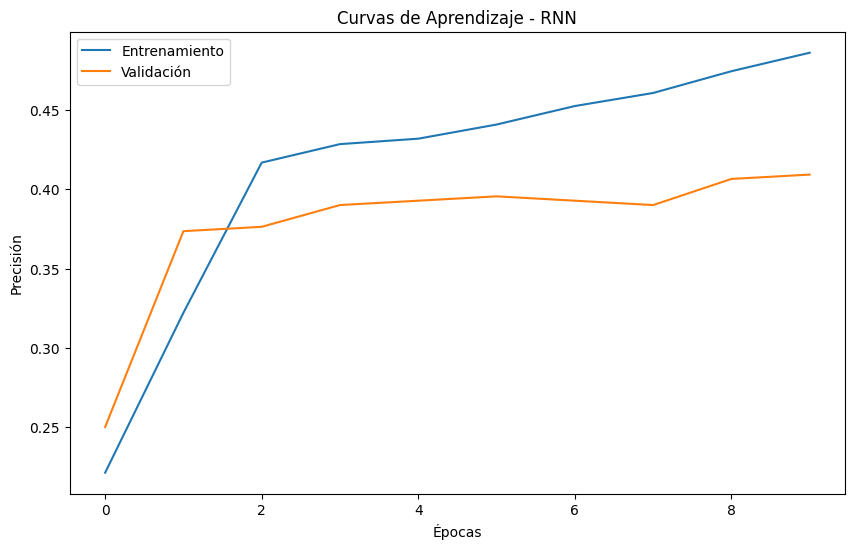

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=128, return_sequences=False))
model_rnn.add(Dense(units=64))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
optimizer = keras.optimizers.Adam(learning_rate=0.00001)

model_rnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'],)

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 567ms/step - accuracy: 0.4012 - loss: 1.3813 - val_accuracy: 0.3764 - val_loss: 1.3794
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 550ms/step - accuracy: 0.4149 - loss: 1.3742 - val_accuracy: 0.3709 - val_loss: 1.3742
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 542ms/step - accuracy: 0.4016 - loss: 1.3680 - val_accuracy: 0.3736 - val_loss: 1.3694
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 545ms/step - accuracy: 0.4045 - loss: 1.3622 - val_accuracy: 0.3791 - val_loss: 1.3646
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 539ms/step - accuracy: 0.4389 - loss: 1.3500 - val_accuracy: 0.3681 - val_loss: 1.3600
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 630ms/step - accuracy: 0.3991 - loss: 1.3519 - val_accuracy: 0.3654 - val_loss: 1.3556
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 630ms/step - accuracy: 0.4066 - loss: 1.3456 - val_accuracy: 0.3709 - val_loss: 1.3513
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 599ms/step - accuracy: 0.4037 - loss: 1.3356 - val_accu

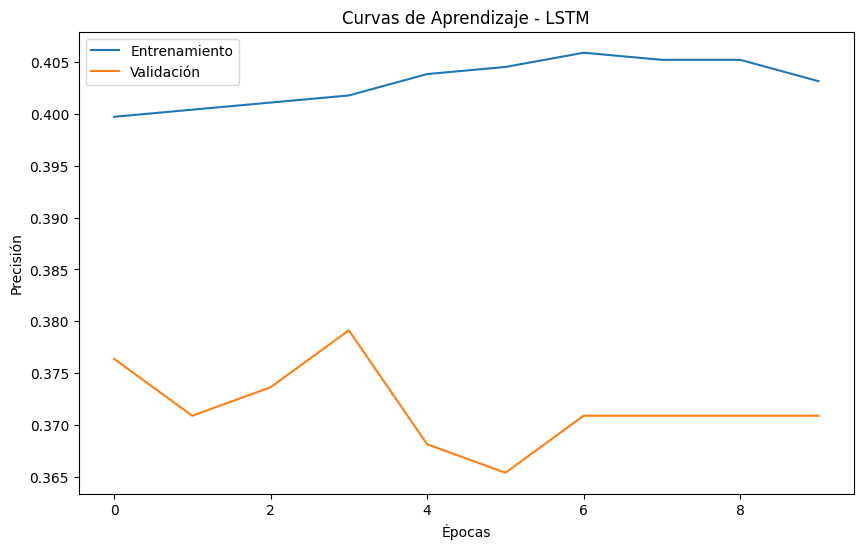

In [106]:
from keras.layers import LSTM, Dropout

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
# model_lstm.add(Dense(units=32, activation='relu'))
# model_lstm.add(Dropout(rate=0.5))
model_lstm.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.08      0.01      0.02        79
     cultura       0.43      0.94      0.59       135
    economia       0.45      0.22      0.29        78
    justicia       0.20      0.06      0.09        72

    accuracy                           0.41       364
   macro avg       0.29      0.31      0.25       364
weighted avg       0.31      0.41      0.30       364

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.33      0.03      0.05        79
     cultura       0.37      0.99      0.54       135
    economia       0.00      0.00      0.00        78
    justicia       0.00      0.00      0.00        72

    accuracy                           0.37       364
   macro avg       0.18      0.25      0.15       364
weighted avg       0.21      0.37      0.21     

c:\Users\ingen\Documents\estudio\especializacion_ml\ml\nlp\nlp_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingen\Documents\estudio\especializacion_ml\ml\nlp\nlp_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ingen\Documents\estudio\especializacion_ml\ml\nlp\nlp_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

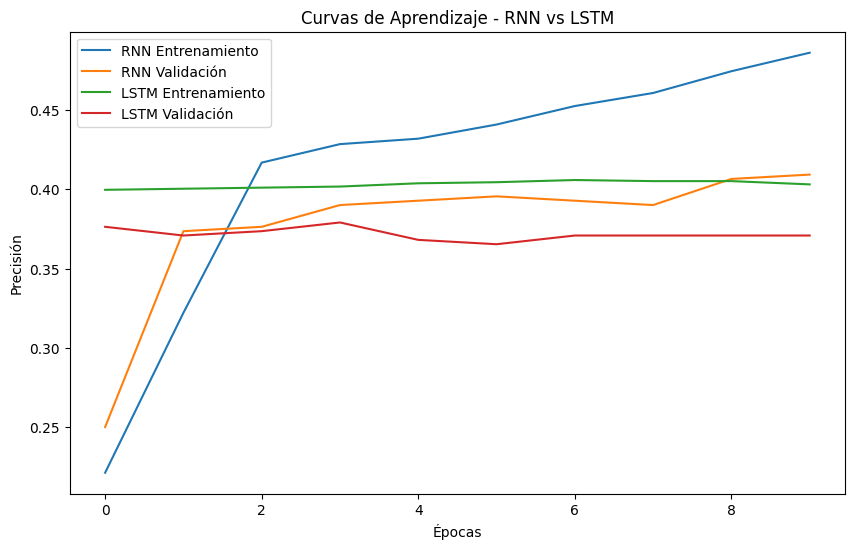

In [107]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()